In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn')
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [29]:
plt.rcParams['figure.figsize'] = [15, 10]

In [30]:
data = pd.read_csv('test_data.csv', index_col='IDX')
data.DATES = pd.to_datetime(data.DATES, format='%Y-%m-%d')
#data = pd.read_csv('t1_v2.csv', index_col='IDX')
#data.DATES = pd.to_datetime(data.DATES, format='%d-%b-%Y')

In [31]:
data.shape

(406, 3)

In [32]:
data.describe()

,VOL,DURATION
count,406.000000,406.000000
mean,13103.371921,79.536798
std,10759.021806,50.777407
min,614.000000,1.930000
25%,8465.250000,39.137500
50%,10799.000000,82.480000
75%,13466.250000,102.185000
max,84596.000000,323.760000


In [33]:
data.head()

,DATES,VOL,DURATION
IDX,,,
1,2017-06-29,1498,4.14
2,2017-06-30,947,3.53
3,2017-07-01,1503,4.91
4,2017-07-02,1992,5.73
5,2017-07-03,1274,3.59


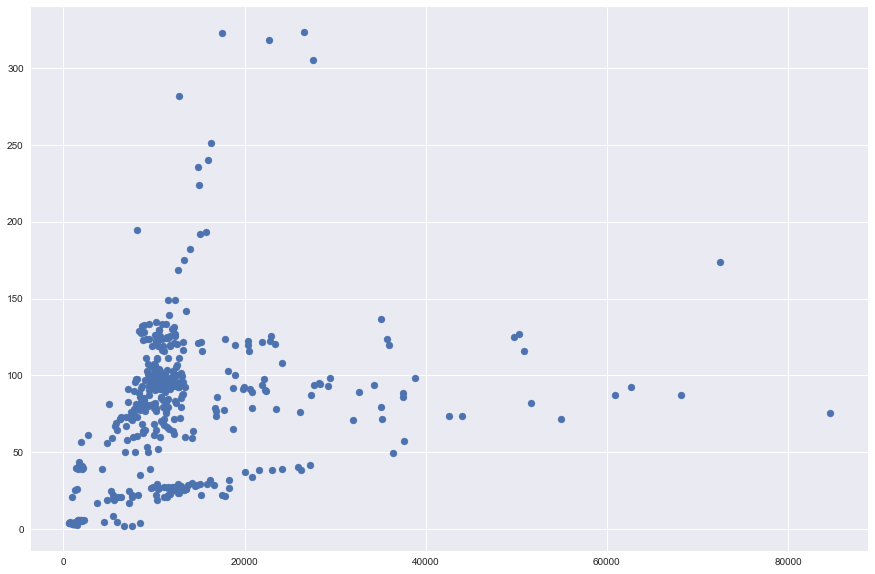

In [34]:
plt.scatter(data.VOL, data.DURATION)
plt.show()

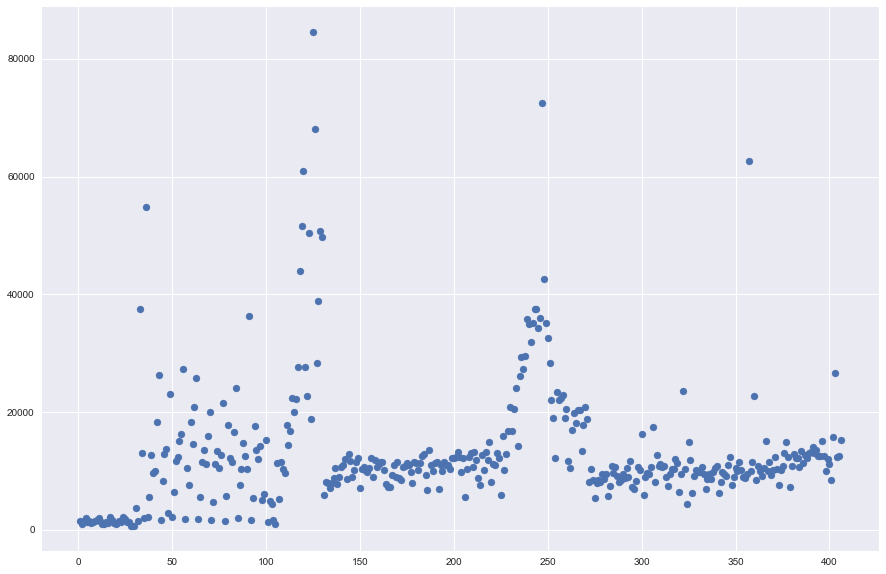

In [35]:
plt.scatter(data.index, data.VOL)
plt.show()

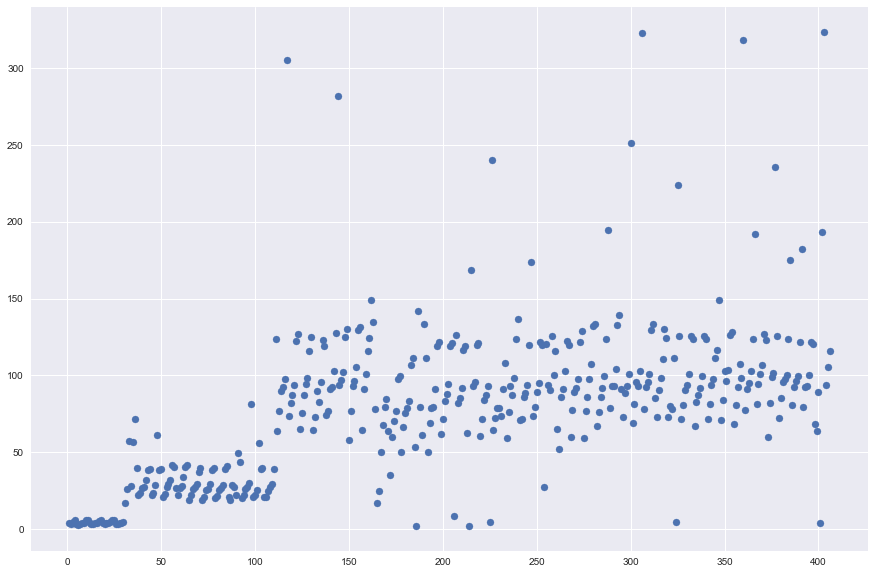

In [36]:
plt.scatter(data.index, data.DURATION)
plt.show()

In [53]:
X = data.drop(['DATES','DURATION'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(X, data.DURATION, test_size=0.25,random_state=5)

In [37]:
#X = data.drop(['DATES','DURATION'], axis = 1)

lm = LinearRegression()
lm.fit(X, data.DURATION)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
print ('Estimated incercept coefficient: ', lm.intercept_)

Estimated incercept coefficient:  61.506124844702356


In [39]:
print ('Number of coefficients: ', len(lm.coef_))

Number of coefficients:  1


In [54]:
#pd.DataFrame(zip(X.columns.tolist(), lm.coef_), columns = ['features', 'estimatedCoeff'])
#X.columns.tolist()

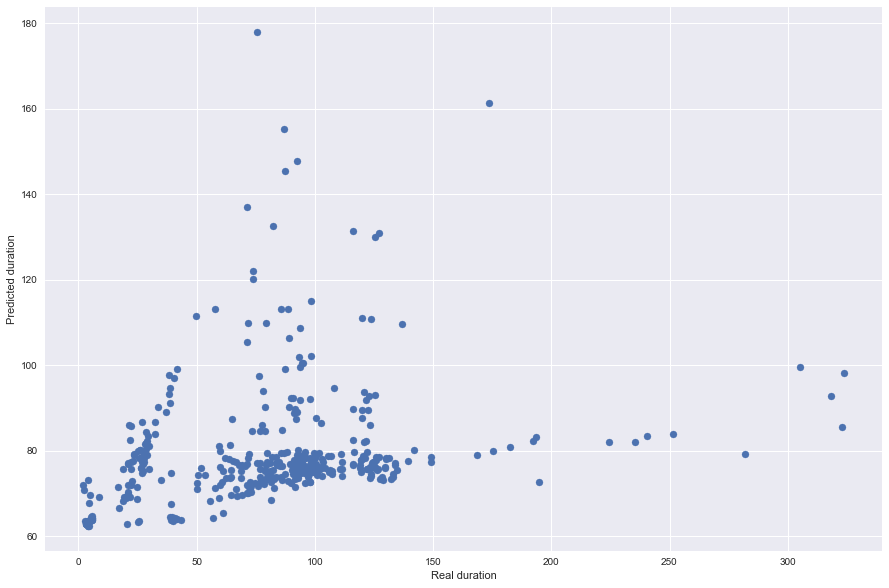

In [41]:
plt.scatter(data.DURATION, lm.predict(X))
plt.xlabel("Real duration")
plt.ylabel("Predicted duration");

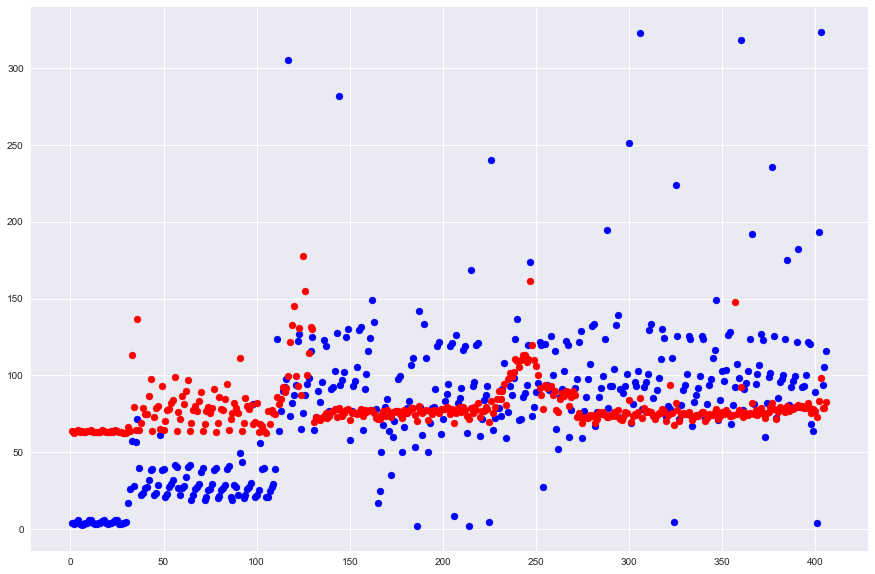

In [48]:
plt.scatter(data.index, data.DURATION,color='blue')
plt.scatter(data.index, lm.predict(X),color='red')
plt.show()

In [43]:
mseFull = np.mean(data.DURATION - lm.predict(X) ** 2)
print(mseFull)

-6465.206798812499


In [44]:
lm = LinearRegression()
lm.fit(X[['VOL']], data.DURATION)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
mseVOL = np.mean((data.DURATION - lm.predict(X[['VOL']])) ** 2)
print(mseVOL)

2353.3530750791265
